In [3]:
from dime import *
from config_sim import *
import numpy as np
import matplotlib.pyplot as plt

In [94]:
n_lat=180
n_lon=360
r_deg=10
lat_deg=-60
lon_deg=0
r1_deg=5
lat1_deg=0
lon1_deg=60

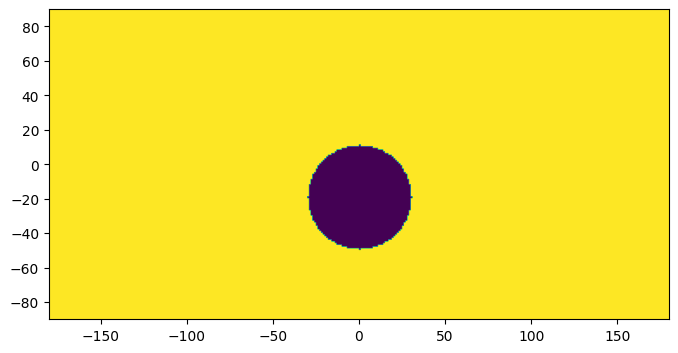

In [43]:
fakemap = np.ones((n_lat, n_lon))
x, y = np.meshgrid(np.linspace(-n_lon/2, n_lon/2-1, n_lon), np.linspace(-n_lat/2, n_lat/2-1, n_lat))
fakemap[np.sqrt((y-lat_deg)**2 + (x-lon_deg)**2) <= r_deg] = 0.9 # default spot at lon=0
plt.figure(figsize=(8,6))
plt.imshow(fakemap, origin='lower', extent=(-180, 180, -90, 90));

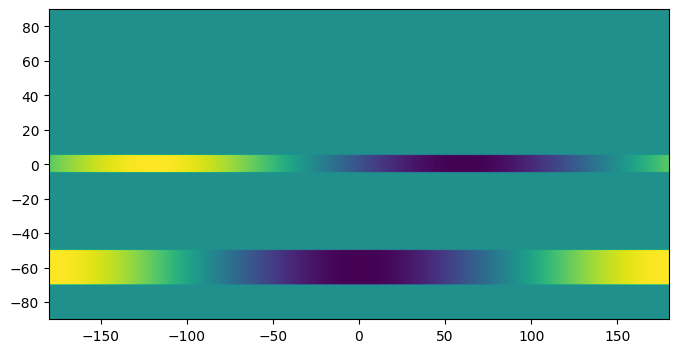

In [97]:
contrast = 0.8
amp = 1. - contrast
fakemap = np.ones((n_lat, n_lon))
band_ind = np.s_[90+lat_deg-r_deg:90+lat_deg+r_deg]
fakemap[band_ind] += amp * np.sin((x[band_ind]-lon_deg-90) * np.pi/180)
band1_ind = np.s_[90+lat1_deg-r1_deg:90+lat1_deg+r1_deg]
fakemap[band1_ind] += amp * np.sin((x[band1_ind]-lon1_deg-90) * np.pi/180)

plt.figure(figsize=(8,6))
plt.imshow(fakemap, origin='lower', extent=(-180, 180, -90, 90));

In [70]:
import paths
fakemap = str(paths.data / 'modelmaps/SPOT.png')

In [147]:
img = np.loadtxt(paths.data/'modelmaps/gcm.txt')

In [148]:
img = zoom(img, (180/img.shape[0], 360/img.shape[1]), mode='nearest')
img.shape

(180, 360)

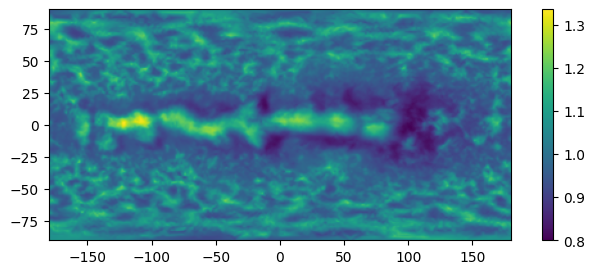

In [151]:
lon_deg = 100
img /= np.median(img)
diff = 1 - img
ampold = diff.max()
amp = 1 - contrast
diffnew = diff * amp / ampold
fakemap = 1 - diffnew
fakemap = np.roll(fakemap, shift=int(lon_deg), axis=1)
plt.figure(figsize=(8,3))
plt.imshow(fakemap, origin='lower', extent=(-180, 180, -90, 90))
plt.colorbar();

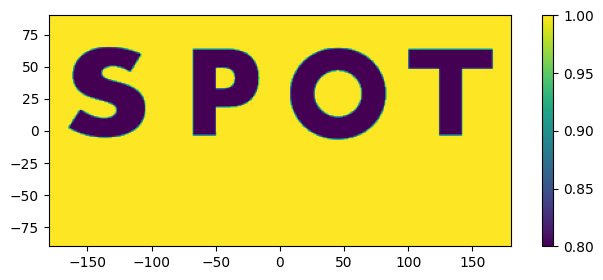

In [162]:
contrast = 0.8
amp=1-contrast
img = plt.imread(paths.data/'modelmaps/SPOT.png')
img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
img = zoom(img[::-1], (180/img.shape[0], 360/img.shape[1]), mode='nearest')
img /= np.median(img)
diff = 1. - img
diffnew = diff * amp / diff.max()
fakemap = 1. - diffnew
plt.figure(figsize=(8,3))
plt.imshow(fakemap, origin='lower', extent=(-180, 180, -90, 90))
plt.colorbar();

In [160]:
fakemap.max()

0.9999769234317623

In [158]:
img.min()

0.1333200069531798

In [154]:
img.shape

(180, 360, 3)

In [4]:
wav_nm, template, observed, error = load_data(model_datafile, goodchips)


Data loaded from file /Users/xqchen/workspace/maxentropy_doppler_imaging/data/IGRINS_W1049B_K_t1500g1000f8.pickle.
nobs: 14, nchip: 11, npix: 1848
observed: (14, 11, 1648)
template: (14, 11, 1648)
wav: (11, 1648)


In [8]:
x = np.arange(100, 100+len(wav_nm[0]))
x

array([ 100,  101,  102, ..., 1745, 1746, 1747])

In [ ]:
np.linspace()

In [41]:
x = np.arange(pad, wav_nm.shape[1]+pad)
x_new = np.arange(0, wav_nm.shape[1]+pad*2)
wav0_nm = np.array([interpolate.interp1d(x, chip, fill_value='extrapolate')(x_new) for chip in wav_nm])

In [43]:
wav0_nm.shape

(11, 1848)

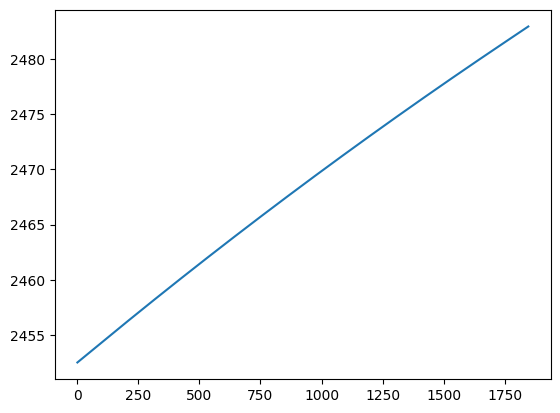

In [42]:
plt.plot(wav0_nm[0])

In [37]:
wav0_nm.shape

(11, 1848)

In [12]:
array = wav_nm[0]

In [33]:
pad = 100
wav0_nm = np.concatenate([2*array[0] - array[pad-1::-1], array, 2*array[-1] - array[:-pad-1:-1]])


ValueError: operands could not be broadcast together with shapes (11,) (11,100) 

In [35]:
(2*wav_nm[:,0] - wav_nm[:,pad-1::-1]).shape

ValueError: operands could not be broadcast together with shapes (11,) (11,100) 